Used IneptionResNetV2 model and gave about 92.33% accuracy

Xception and NasNet model gave around 89-91%

Resnet and VGG-16 models gave around 70-80%

## Import Libraries

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [3]:
df = pd.read_csv('dataset/train.csv')
df

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous
...,...,...
6464,image2096.jpg,Christmas_Tree
6465,image1474.jpg,Miscellaneous
6466,image4124.jpg,Airplane
6467,image7695.jpg,Candle


## Data at a Glance

In [4]:
df['Class'].value_counts()

Miscellaneous     2801
Christmas_Tree    1539
Jacket             640
Candle             593
Airplane           535
Snowman            361
Name: Class, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Class'>

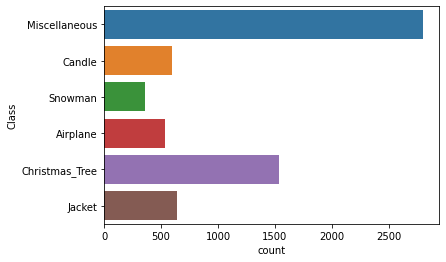

In [5]:
sns.countplot(y=df['Class'])

In [6]:
## Paths for image data

train_images = "dataset/train/"
test_images = "dataset/test/"

(107, 80, 3)


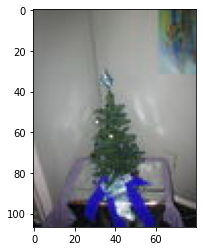

In [7]:
import cv2

img = cv2.imread(train_images+"image1.jpg")

print(img.shape)

plt.imshow(img)

(53, 80, 3)


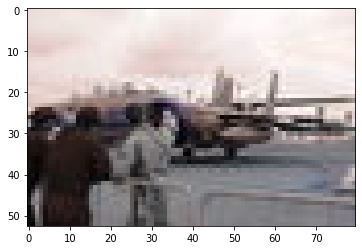

In [8]:
img = cv2.imread(train_images+"image2.jpg")

print(img.shape)

plt.imshow(img)

As we can see we have images of different shapes throughout our dataset

## Data Preparation

In [9]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df, test_size=0.2, stratify = df['Class'].values, shuffle=True)

In [10]:
train_df.shape

(5175, 2)

In [11]:
image_size = [299, 299]

In [12]:
train_df.reset_index(inplace=True, drop=True)
valid_df.reset_index(inplace=True, drop=True)

In [13]:
train_df['Class'].value_counts()

Miscellaneous     2241
Christmas_Tree    1231
Jacket             512
Candle             474
Airplane           428
Snowman            289
Name: Class, dtype: int64

In [14]:
valid_df['Class'].value_counts()

Miscellaneous     560
Christmas_Tree    308
Jacket            128
Candle            119
Airplane          107
Snowman            72
Name: Class, dtype: int64

### Data Augmentation

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                  horizontal_flip=True)

In [16]:
training_set = train_datagen.flow_from_dataframe(dataframe=train_df, directory=train_images,
                                                x_col='Image', y_col='Class', class_mode='categorical',
                                                target_size=(299,299), batch_size=32)

Found 5175 validated image filenames belonging to 6 classes.


In [17]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
validation_set = validation_datagen.flow_from_dataframe(dataframe=valid_df, directory=train_images,
                                                       x_col='Image', y_col='Class', class_mode='categorical',
                                                       target_size=(299,299), batch_size=32)

Found 1294 validated image filenames belonging to 6 classes.


In [19]:
image_size + [3]

[299, 299, 3]

## Modeling

In [20]:
## Loading in a large InceptionResnetV2 model as part of Transfer learning

inception = InceptionResNetV2(input_shape=image_size + [3], weights='imagenet',include_top=False)

for layer in inception.layers:
    layer.trainable=False

In [21]:
## Building and Summarizing a Sequential Model

model = Sequential([
    inception,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [22]:
## Compile the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
## Time to Fit

r = model.fit_generator(training_set,
                        validation_data=validation_set,
                        epochs=12,
                        steps_per_epoch=training_set.n//32,
                        validation_steps=validation_set.n//32
                       )


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/12
161/161 [==============================] - 183s 1s/step - loss: 0.8634 - accuracy: 0.7050 - val_loss: 0.3714 - val_accuracy: 0.8672
Epoch 2/12
161/161 [==============================] - 184s 1s/step - loss: 0.4949 - accuracy: 0.8343 - val_loss: 0.3479 - val_accuracy: 0.8742
Epoch 3/12
161/161 [==============================] - 179s 1s/step - loss: 0.4567 - accuracy: 0.8528 - val_loss: 0.3668 - val_accuracy: 0.8727
Epoch 4/12
161/161 [==============================] - 183s 1s/step - loss: 0.4181 - accuracy: 0.8590 - val_loss: 0.3011 - val_accuracy: 0.8977
Epoch 5/12
161/161 [==============================] - 173s 1s/step - loss: 0.3819 - accuracy: 0.8721 - val_loss: 0.3022 - val_accuracy: 0.8992
Epoch 6/12
161/161 [==============================] - 170s 1s/step - loss: 0.3912 - accuracy: 0.8660 - val_loss: 0.3042 - val_accuracy: 0.8922
Epoch 7/12
161/161 [==============================] - 170s 1s/step

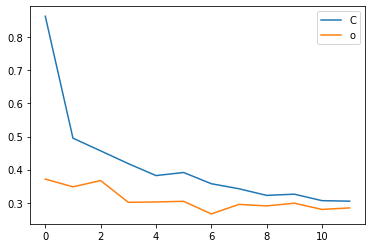

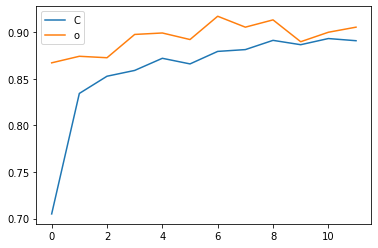

<Figure size 432x288 with 0 Axes>

In [27]:
# Loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend("Comaparing Losses")
plt.show()
plt.savefig('loss.pdf')

# Accuracies
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend('Comparing Accuracy')
plt.show()
plt.savefig('accuracy.pdf')

In [30]:
## Make predictions and bring it in the form of submittion format

name=[]
y_pred=[]

labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())

for i in os.listdir('dataset/test/'):
    name.append(i)
    im='dataset/test/'+i
    
    # Loading test images
    img=image.load_img(im,target_size=(299,299,3))
    
    #Applying the same data-preprocessing steps on the test data.
    img=image.img_to_array(img)/255
    pred=model.predict(img.reshape(1,299,299,3))
    y_pred.append(labels[np.argmax(pred[0])])
    

In [31]:
data=pd.DataFrame((zip(name,y_pred)),columns=['Image','Class'])

In [32]:
data

,Image,Class
0,image10.jpg,Miscellaneous
1,image100.jpg,Airplane
2,image1013.jpg,Jacket
3,image1014.jpg,Miscellaneous
4,image1018.jpg,Christmas_Tree
...,...,...
3484,image9953.jpg,Christmas_Tree
3485,image9956.jpg,Miscellaneous
3486,image9958.jpg,Christmas_Tree
3487,image9960.jpg,Candle


In [ ]:
#data.to_csv('my_submission2-incep.csv',index=False)

In [28]:
from PIL import Image

In [29]:
img = Image.open('accuracy.jpg')
img.show()